### EDA

In [1]:
import pandas as pd


# 데이터 불러오기
df = pd.read_csv('Mall_Customers.csv')

# 기본 정보 확인
print('데이터 상위 5행 확인: \n', df.head())    # 데이터 상위 5행 확인
print('\n데이터 크기 확인: \n', df.shape)   # 데이터 크기 확인
print('\n데이터 타입과 결측치 확인: \n', df.info())    # 데이터 타입과 결측치 확인
print('\n결측값 확인: \n', df.isnull().sum())    # 결측값 확인
print('\n중복값 확인: \n', df.duplicated().sum()) # 중복값 확인
print('\n수치형 데이터의 요약 통계량: \n', df.describe())    # 수치형 데이터의 요약 통계량


# 결측값 제거: df.dropna()
# 결측값 대체: df.fillna()

# 머신러닝을 위해 연령 그룹 콜럼 추가 추천

데이터 상위 5행 확인: 
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

데이터 크기 확인: 
 (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

데이터 타입과 결측치 확인: 

### 이상치 확인

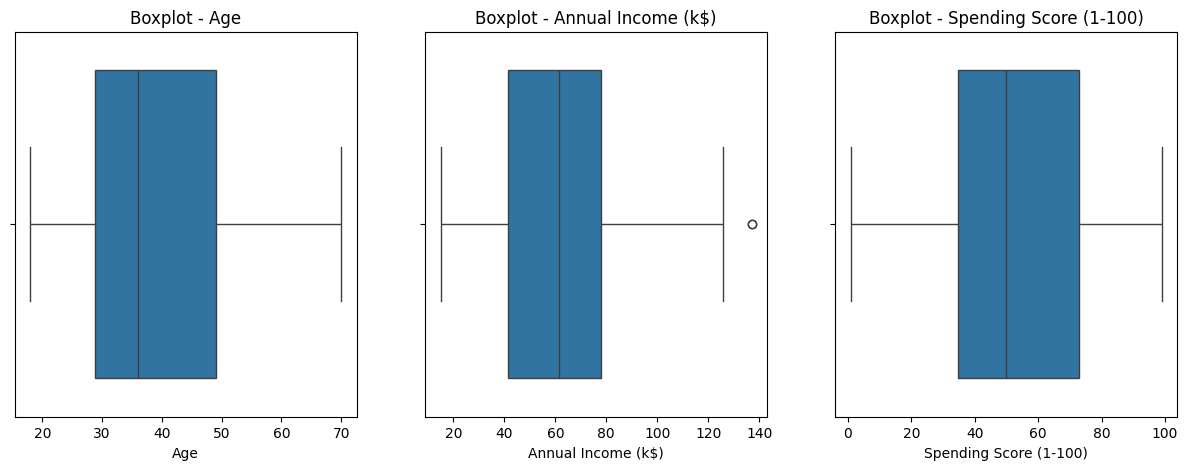

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 5))

# Age
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Age'])
plt.title('Boxplot - Age')

# Annual Income
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot - Annual Income (k$)')

# Spending Score
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot - Spending Score (1-100)')

plt.show()

### 그래프 시각화

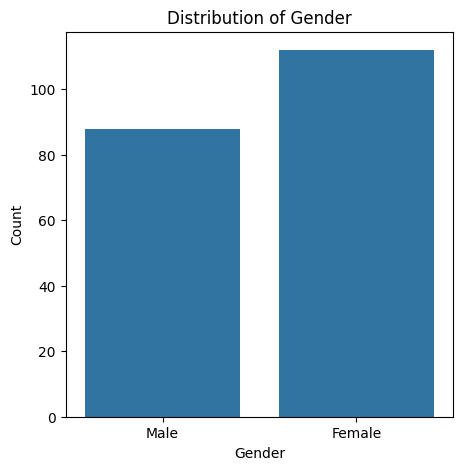

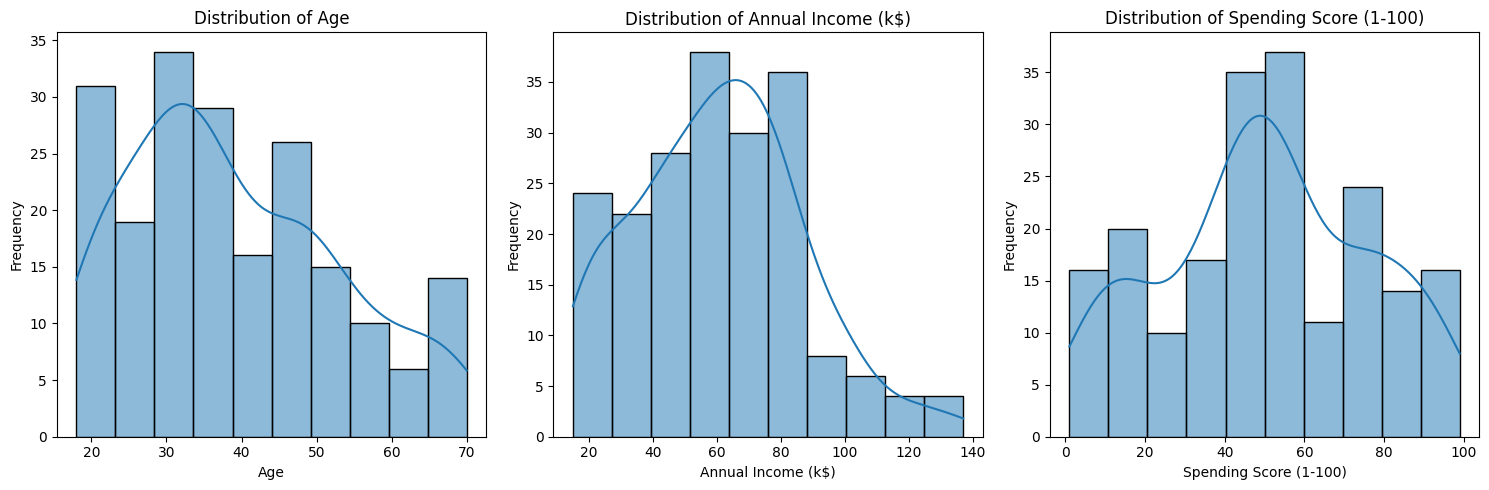

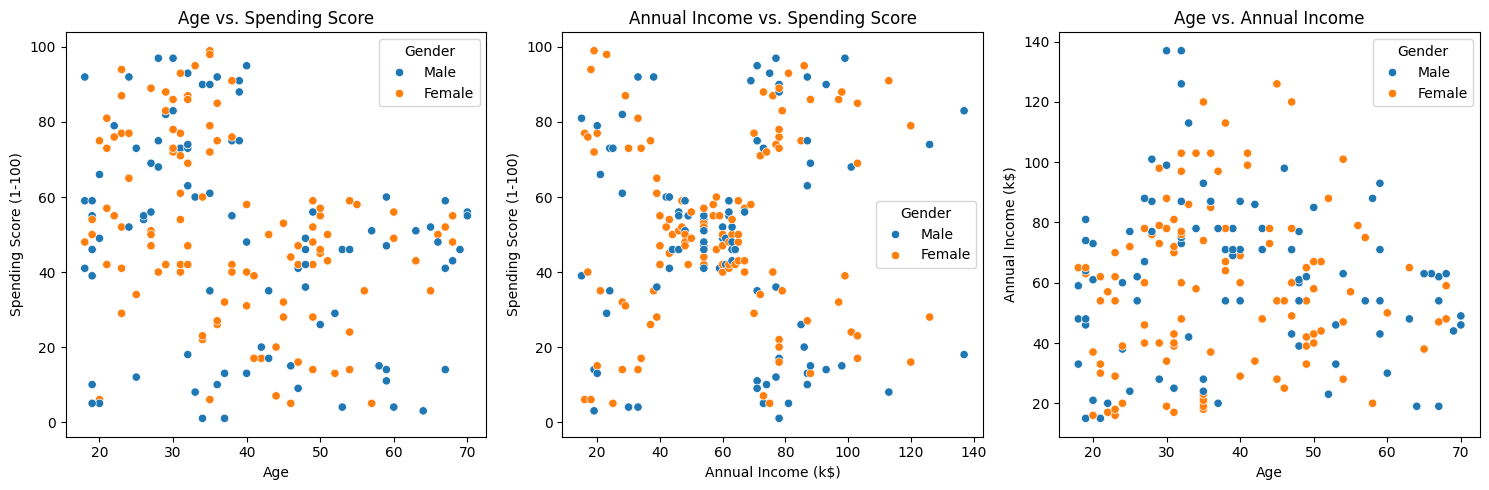

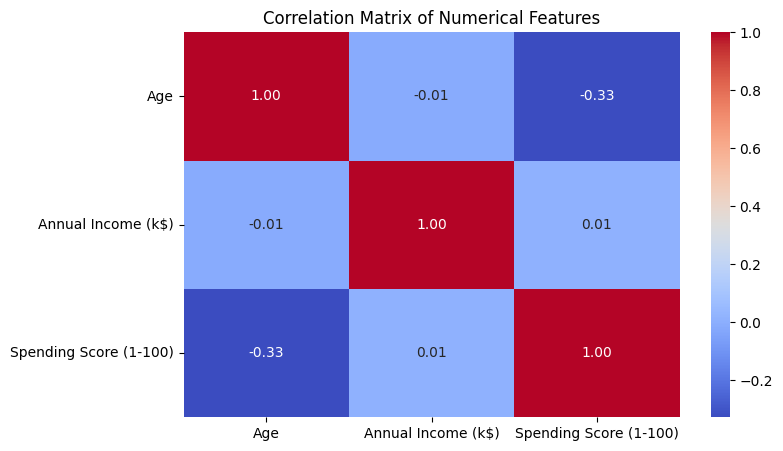

In [ ]:

# Gender 분포 확인
plt.figure(figsize=(5, 5))
# 각 범주의 관측치 수를 막대로 보여주는 Seaborn 함수
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



# 수치형 변수들의 분포 확인 (히스토그램)
plt.figure(figsize=(15, 5))

# sns.histplot은 히스토그램을 그리는 Seaborn 함수
# 'Age' 열의 데이터를 히스토그램에 사용하도록 지정
# bins=10은 데이터를 10개의 동일한 너비의 구간(범위)으로 나누어 빈도를 계산
# kde=True는 분포의 평활화된 표현인 커널 밀도 추정(KDE) 곡선 추가

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# 변수 간의 관계 확인 (산점도)
plt.figure(figsize=(15, 5))

# sns.scatterplot은 산점도를 그리는 Seaborn 함수

# Age vs. spending score
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Age vs. Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# Annual Income vs. spending score
plt.subplot(1, 3, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')


# Age vs. Annual Income
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender')
plt.title('Age vs. Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

plt.tight_layout()
plt.show()



# 상관 관계 매트릭스 (히트맵)
plt.figure(figsize=(8, 5))

# .corr()으로 선택된 열들 사이의 쌍별 상관 관계를 계산
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
# 상관 관계를 기반으로 히트맵 작성. annot=True로 히트맵 셀에 상관 관계 값 표시. cmap 으로 색 스키마 설정. 소수점 둘째 자리까지 표시.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### 가설
연령이 증가할 수록 소비 점수가 낮아지는 경향이 있다.
젊은 사람들이 트렌드에 더 민감하거나, 온라인 쇼핑 등에 더 익숙하여 소비 점수가 높을 수 있다.